In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        sum_x = np.sum(X)
        sum_y = np.sum(Y)
        sum_xy = np.sum(np.multiply(X, Y))
        sum_x2 = np.sum(np.multiply(X, X))
        n = len(X)
        
        self.b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
        self.a = (sum_y - self.b * sum_x) / n
    
    def predict(self, X):
        return self.b * X + self.a

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               58 non-null     int64
 1   Gold Prices in Rs  58 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [5]:
data.head()

,Year,Gold Prices in Rs
0,1965,72
1,1966,84
2,1967,103
3,1968,162
4,1969,176


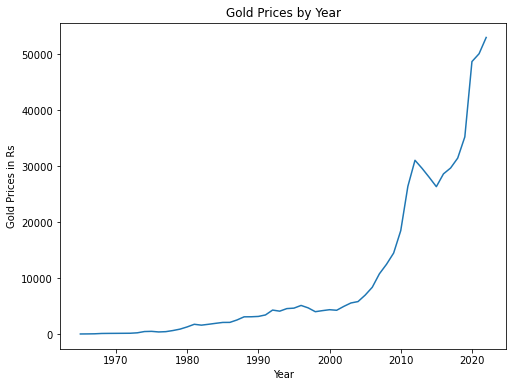

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Gold Prices in Rs'])
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Gold Prices by Year')
plt.show()

In [7]:
X, Y = data['Year'].values.reshape(-1, 1), data['Gold Prices in Rs'].values.reshape(-1, 1)

In [8]:
mymodel = MyLinearRegression()

mymodel.fit(X, Y)

Y_pred = mymodel.predict(X)

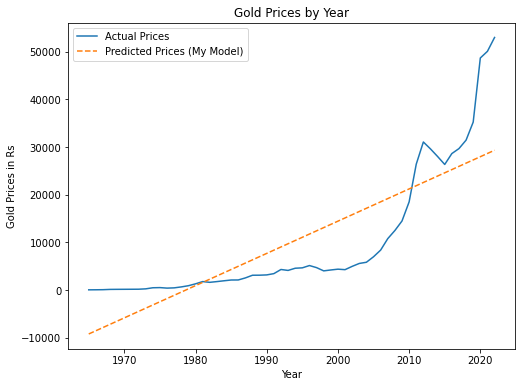

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Gold Prices in Rs'], label='Actual Prices')
plt.plot(X, Y_pred, '--', label='Predicted Prices (My Model)')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Gold Prices by Year')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

skmodel = LinearRegression()

skmodel.fit(X, Y)

skY_pred = skmodel.predict(X)

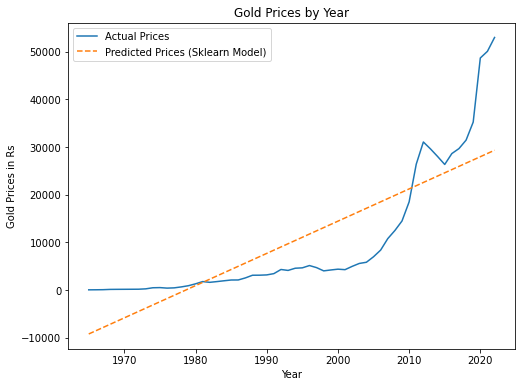

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Gold Prices in Rs'], label='Actual Prices')
plt.plot(X, skY_pred, '--', label='Predicted Prices (Sklearn Model)')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Gold Prices by Year')
plt.legend()
plt.show()

In [12]:
print(f'My Model Line Equation: {mymodel.a} + {mymodel.b} * X')
print(f'Sklearn Model Line Equation: {skmodel.intercept_[0]} + {skmodel.coef_[0][0]} * X')

My Model Line Equation: -1336226.704266511 + 675.343658679135 * X
Sklearn Model Line Equation: -1336226.704266511 + 675.343658679135 * X


In [13]:
diff = Y - Y_pred

In [14]:
print(f'Error: {np.sum(diff)}')

Error: 9.313225746154785e-10


In [15]:
mse = np.sum(np.multiply(diff, diff)) / len(X)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 62644360.72375505
Root Mean Squared Error: 7914.819058181623


In [16]:
print(f'Prediction for the Year 2025 for 1 gram: {mymodel.predict(2025) / 10}')

Prediction for the Year 2025 for 1 gram: 3134.4204558737574
